# Mini Project 5

Welcome to the last Mini Project! In this assignment, you will implement autoencoders (AEs) and generative adversarial networks (GANs) based on the relevant concepts learned in the class.

---
**Requirements**: 
- Your code should follow [PEP 8](https://www.python.org/dev/peps/pep-0008/) with necessary comments.

## Task 1: Autoencoders vs. Principal Components Analysis
Principal components analysis (PCA) is a common used method for dimensionality reduction. It's an unsupervised technique that reduces the dimensionality of the data by **orthogonally transforming** the data into a set of principal components. The first principal component explains the most amount of the variation in the data in a single component, the second component explains the second most amount of the variation, etc. By choosing the top principal components that explain say 80-90% of the variation, the other components can be dropped since they do not significantly benefit the model.

Autoencoder is another unsupervised technique can be used for dimensionality reduction in which we leverage neural networks for the task of representation learning. Specifically, a **bottleneck** will be imposed in the network which forces a compressed knowledge representation of the original input.

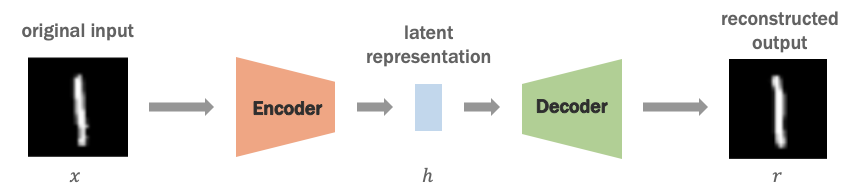


**Tasks**

In this task, you will build two models for dimensionality reduction based on PCA and Autoencoder, respectively. You will use the developed models on the handwritten digits and compare the performance. **The reduced dimension should be two so that the visualization is convenient.**

1. Load [MNIST](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data) dataset and prepross the dataset.
2. Design a PCA model for dimensionality reduction. Please check [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) for more information.
3. Implement a Autoencoder based on TensorFlow 2.x.
4. Compare the reconstruction losses (MSE) of PCA and Autoencoder on the test data.
5. Visualize the reduced results of PCA and Autoencoder.
6. Analysis the pros and cons of each model.

In [359]:
# TODO: write your code here
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras import datasets, layers, models

# Downloading the mnist dataset
tf.keras.datasets.mnist.load_data(path='mnist.npz')
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Preprocessing the training and test data
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print("Shape of training data: {}.".format(X_train.shape))
print("Shape of test data: {}.".format(X_test.shape))

Shape of training data: (60000, 784).
Shape of test data: (10000, 784).


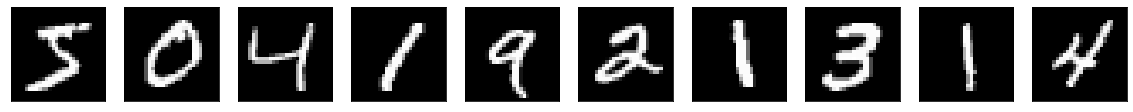

In [360]:
# Visualizing some samples from the mnist dataset
plt.figure(figsize=(20, 10))
for i in range(10):    
    # Visualize original images
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [361]:
""" PCA """

# Dimensionality reduction using PCA
pca = PCA(n_components=32)
pca.fit(X_train)
train = pca.transform(X_train)
test = pca.transform(X_test)
approximation = pca.inverse_transform(test)

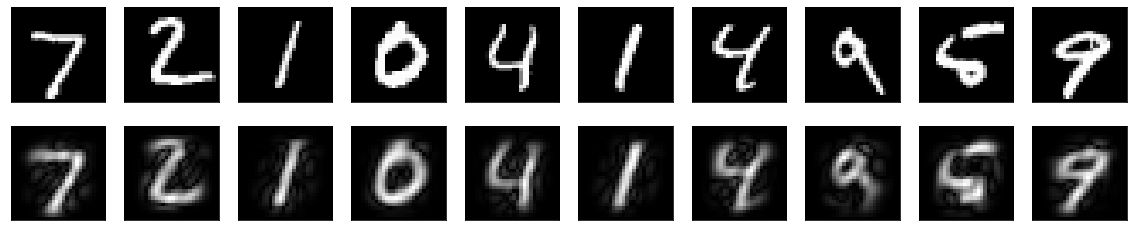

In [362]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):    
    # Visualize original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Visualize reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(np.abs(approximation[i]).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [505]:
d = {}
for i in range(len(test)):
    if y_test[i] in dict:
        dict[y_test[i]].append(test[i])
    else:
        dict[y_test[i]]=[]
        dict[y_test[i]].append(test[i])

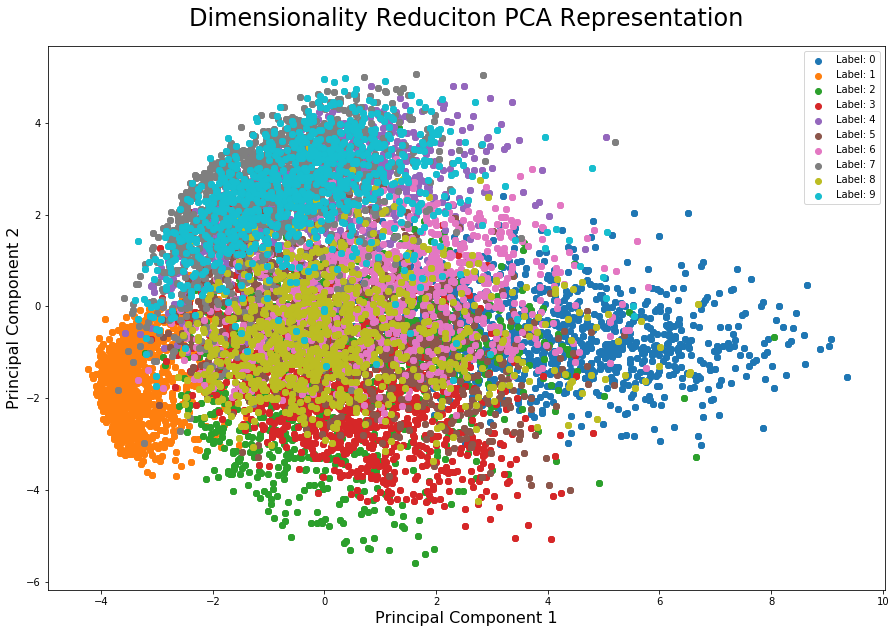

In [538]:
# Visualizing dimenstionaly reduction in PCA
plt.figure(figsize=(15,10))
for i in range(10):
    points = np.array(dict[i])
    plt.scatter(points[:,0], points[:,1], label='Label: '+str(i))
plt.title("Dimensionality Reduciton PCA Representation", fontsize=24, pad=20)
plt.xlabel('Principal Component 1', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
legend = plt.legend(fontsize=10)

Model: "model_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_51 (InputLayer)       [(None, 784)]             0         
                                                                 
 Encoder (Functional)        (None, 2)                 113026    
                                                                 
 Decoder (Functional)        (None, 784)               476752    
                                                                 
Total params: 589,778
Trainable params: 589,778
Non-trainable params: 0
_________________________________________________________________


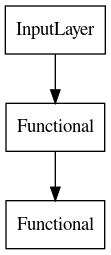

In [539]:
""" AUTOENCODER """

# Dimensionality reduction using autoencoder

from keras.models import Model
from keras.layers import Input, Dense

n_components=2

encoded_in = Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(encoded_in)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded_out = layers.Dense(n_components, activation='leaky_relu')(encoded)

decoded_in = layers.Input(shape=n_components)
decoded = layers.Dense(64, activation='relu')(decoded_in)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded_out = layers.Dense(784, activation='sigmoid')(decoded)

# Mapping input image to its reconstructed image
encoder = keras.Model(encoded_in, encoded_out, name="Encoder")
decoder = keras.Model(decoded_in, decoded_out, name="Decoder")
autoencoder = keras.Model(encoded_in, decoder(encoder(encoded_in)))

# Visualizing model summary
autoencoder.summary()

# Visualizing model structure
tf.keras.utils.plot_model(
    autoencoder, to_file='generator.png', show_shapes=False, show_dtype=False,
    show_layer_names=False, rankdir='TB', expand_nested=False, dpi=96,
)

In [540]:
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=128, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0668 - val_loss: 0.0498
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0466 - val_loss: 0.0441
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0429 - val_loss: 0.0420
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0412 - val_loss: 0.0407
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0400 - val_loss: 0.0396
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0393 - val_loss: 0.0391
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0386 - val_loss: 0.0385
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0381 - val_loss: 0.0380
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0376 - val_loss: 0.0377
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0372 - val_loss: 0.0372

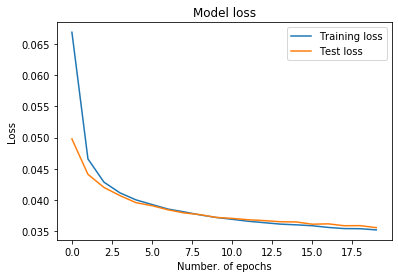

In [541]:
# Visualizing training history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number. of epochs')
plt.legend(['Training loss', 'Test loss'])
plt.show()

In [542]:
# Comparision of PCA Loss and Autoencoder Loss 

# To find the reconstruction loss for PCA using MSE(Mean Squared Error)
mse = tf.losses.MeanSquaredError()
pca_loss = mse(X_test, approximation).numpy()
print("Reconstruction loss in PCA: {}%".format(pca_loss*100))

# To find the reconstruction loss for Autoencoder
print("Reconstruction loss in Autoencoder: {}%".format(history.history['val_loss'][-1]*100))

Reconstruction loss in PCA: 1.6829492524266243%
Reconstruction loss in Autoencoder: 3.5610325634479523%


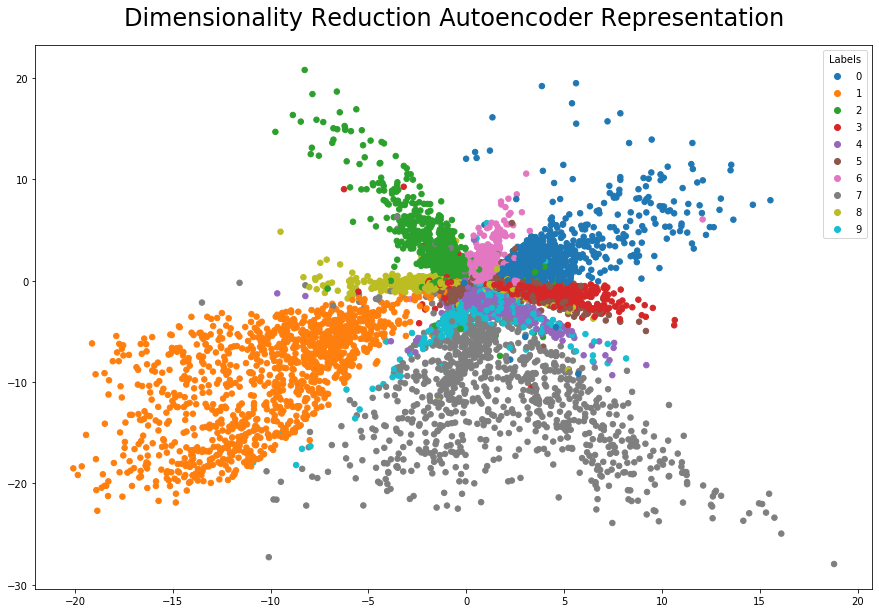

In [546]:
# Visualizing dimenstionaly reduction in Autoencoder
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

plt.figure(figsize=(15,10))
plt.title('Dimensionality Reduction Autoencoder Representation', fontsize =24, pad=20)
scatter = plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1],s=30,c=y_test,cmap='tab10')
legend = plt.legend(*scatter.legend_elements(), title="Labels")

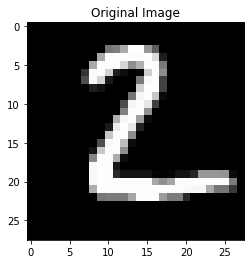

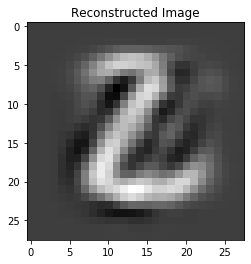

In [552]:
# Visualizing image reconstruction using PCA

i=1
plt.figure(1)
plt.title('Original Image')
plt.imshow(X_test[i].reshape(28,28))
plt.figure(2)
plt.title('Reconstructed Image')
show = plt.imshow(approximation[i].reshape(28,28))

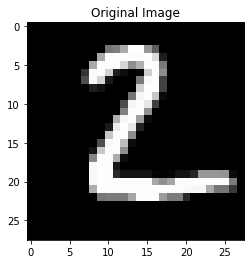

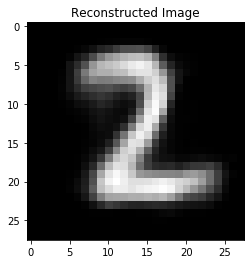

In [551]:
# Visualizing image reconstruction using Autoencoder

plt.figure(3)
plt.title('Original Image')
plt.imshow(X_test[i].reshape(28,28))
plt.figure(4)
plt.title('Reconstructed Image')
show = plt.imshow(decoded_imgs[i].reshape(28,28))

## Task 2: Generative Adversarial Networks
A generative adversarial network (GAN) is a class of machine learning frameworks designed by Ian Goodfellow and his colleagues in 2014. Two neural networks contest with each other in a game (in the form of a zero-sum game, where one agent's gain is another agent's loss). In this task, you need to create a GAN to generate specific class of figures for given condition (class). For example, give a label "3" (which represents Dress), you will use your network to generate a figure of Dress.

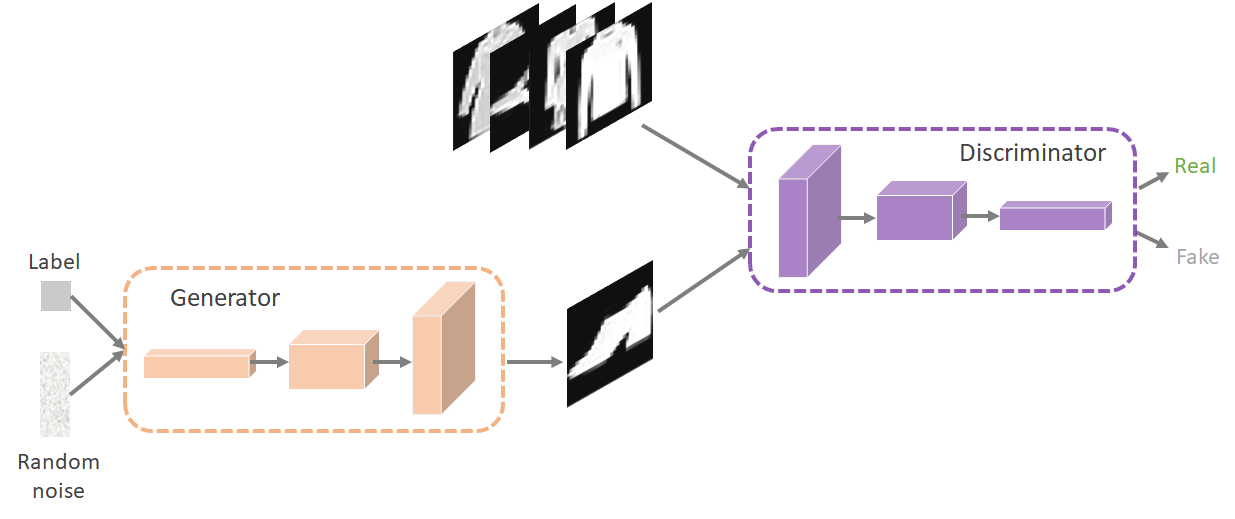



**Dataset**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

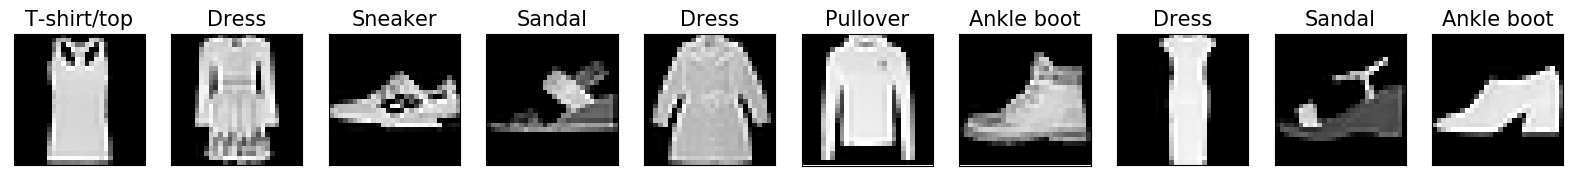

**Tasks**

1. Download the Fashion-Mnist dataset from Canvas and look into the data.
    - The Fashion-Mnist dataset has 60000 training data. Each image is a 28x28 grayscale image, associated with a label from 10 classes. 
2. Load and prepross the dataset.
3. Build a GAN model based on TensorFlow 2.x and plot out the model.
4. Train your model and visualize the training history including the loss of Generator and Discriminator.
5. Plot the intermidiate results through the training procedure. eg.: After each 20 epochs in training plot a grid of generated results. (check this [resource](https://www.tensorflow.org/tutorials/generative/dcgan) to figure out how to save the model and generate the intermediate results during the training)
6. Display final generated results for each of ten classes and discuss your results.

In [41]:
# TODO: write your code here
import os
import PIL
import glob
import time
import imageio
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython import display
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Conv2DTranspose, Flatten, Dropout

logdir = "./logs/scalars/"
file_writer = tf.summary.create_file_writer(logdir + "/metrics")
file_writer.set_as_default()

def load_data(train_file, test_file):

    """
        Loads the dataset, from the given file path.
        
        Parameters
        ----------
        train_file: string
            Path of the train CSV file.
        test_file: string
            Path of the test CSV file.
            
        Return
        ----------
        X_train: array
            Output of training data.
        X_test: array
            Output of test data.
        y_train: array
            Output of training labels.
        y_test: array
            Output of test labels.
    """
    
    # Empty lists to store training, test and label data
    df_train = pd.read_csv(train_file) 
    df_test = pd.read_csv(test_file) 
    
    X_train = df_train.drop("label",axis=1).to_numpy()
    y_train = df_train[["label"]].to_numpy()
    
    X_test = df_test.drop("label",axis=1).to_numpy()    
    y_test = df_test[["label"]].to_numpy()
    
    # Converting train data from numpy array to float32
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
    
    # Normalizing input data to [-1,1] range for the tanh activation function 
    X_train = (X_train - 127.5) / 127.5
    X_test =(X_test - 127.5) / 127.5
        
    return X_train, X_test, y_train, y_test

In [42]:
X_train, X_test, y_train, y_test = load_data('fashion-mnist_train.csv', 'fashion-mnist_test.csv')

In [43]:
# Checking the size of training dataset and training labels
print("Size of the training dataset is {}.".format(X_train.shape))
print("Size of the training labels is {}.".format(y_train.shape))

# Checking the size of test dataset and test labels
print("Size of the test dataset is {}.".format(X_test.shape))
print("Size of the test labels is {}.".format(y_test.shape))

Size of the training dataset is (60000, 28, 28, 1).
Size of the training labels is (60000, 1).
Size of the test dataset is (10000, 28, 28, 1).
Size of the test labels is (10000, 1).


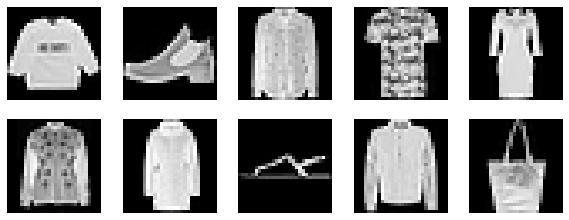

In [44]:
# Visualizing some sample images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1) 
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.axis('off')

In [45]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

# Shuffling and slicing the training data into batches
train_dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [46]:
# Generator model

def generator_model():
    generator = tf.keras.Sequential()
    generator.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    generator.add(layers.BatchNormalization())
    generator.add(layers.LeakyReLU())

    generator.add(layers.Reshape((7, 7, 256)))

    generator.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    generator.add(layers.BatchNormalization())
    generator.add(layers.LeakyReLU())

    generator.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    generator.add(layers.BatchNormalization())
    generator.add(layers.LeakyReLU())

    generator.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert generator.output_shape == (None, 28, 28, 1)

    return generator

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12544)             1254400   
                                                                 
 batch_normalization_6 (Batc  (None, 12544)            50176     
 hNormalization)                                                 
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 7, 7, 128)        819200    
 ranspose)                                                       
                                                                 
 batch_normalization_7 (Batc  (None, 7, 7, 128)       

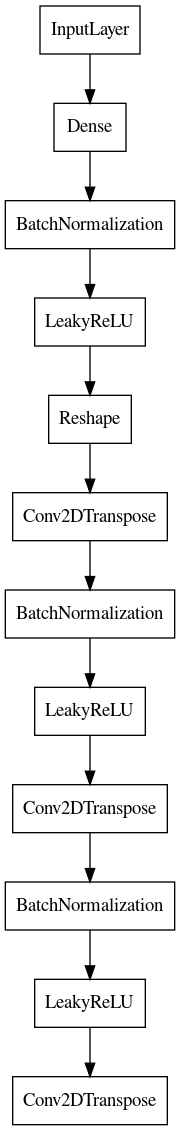

In [47]:
generator = generator_model()

# Visualizing the generator structure
generator.summary()

# Visualizing the generator structure
tf.keras.utils.plot_model(
    generator, to_file='generator.png', show_shapes=False, show_dtype=False,
    show_layer_names=False, rankdir='TB', expand_nested=False, dpi=96,
)

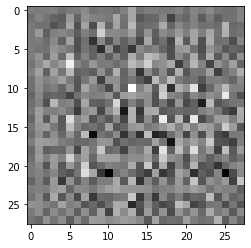

In [48]:
# Creating an image from the untrained generator 
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [49]:
# Discriminator model

def discriminator_model():
    discriminator = tf.keras.Sequential()
    discriminator.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    discriminator.add(layers.LeakyReLU())
    discriminator.add(layers.Dropout(0.3))

    discriminator.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    discriminator.add(layers.LeakyReLU())
    discriminator.add(layers.Dropout(0.3))

    discriminator.add(layers.Flatten())
    discriminator.add(layers.Dense(1))

    return discriminator

Discriminator Decision: tf.Tensor([[-0.00121995]], shape=(1, 1), dtype=float32)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 7, 7, 128)         0         
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 128)         0         
                                        

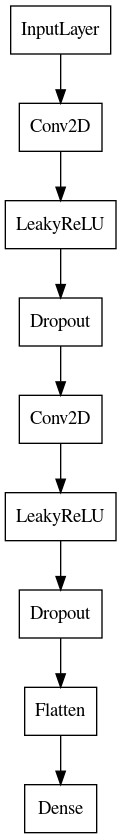

In [50]:
# Predicting the decision from the discriminator
discriminator = discriminator_model()
decision = discriminator(generated_image)
print("Discriminator Decision: " + str(decision))

# Visualizing the discriminator structure
discriminator.summary()

# Visualizing the discriminator structure
tf.keras.utils.plot_model(
    discriminator, to_file='generator.png', show_shapes=False, show_dtype=False,
    show_layer_names=False, rankdir='TB', expand_nested=False, dpi=96,
)

In [51]:
# Method to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [52]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [53]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [54]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [55]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [56]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 10

# This seed will be used overtime to visualize progress in the animated GIF
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [62]:
# This annotation causes the function to be "compiled"


@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)
    
    tf.summary.scalar("Generator Loss", data=gen_loss, step=EPOCHS)
    tf.summary.scalar("Discriminator Loss", data=disc_loss, step=EPOCHS)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [63]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF
    display.clear_output(wait=True)
    generate_and_save_images(generator, epoch + 1, seed)

    # Saves the model every 20 epochs
    if (epoch + 1) % 20 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time taken for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generates output after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator, epochs, seed)

In [64]:
def generate_and_save_images(model, epoch, test_input):

  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(5, 2))

  for i in range(predictions.shape[0]):
      plt.subplot(2, 5, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

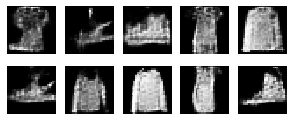

In [65]:
train(train_dataset, EPOCHS)

In [228]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [231]:
anim_file = 'gan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)


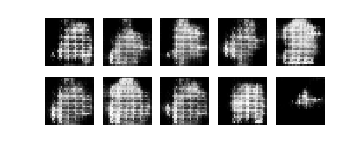

In [232]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

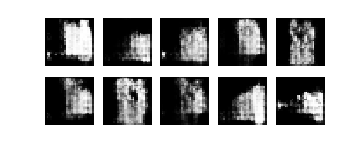

In [553]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))
display_image(EPOCHS)

The picture above shows the final gemerated results for all the 10 classes. In the training phase I noticed that the number of training epochs were propotional to the generated image quality. However, due to computational and time limitation I was runnning between 40-80 epochs and therefore the generated image were not so accurate. 

Also, as the numeber of ecpochs are increase the accuracy of the generator increases while the accuracy of the discriminator decreases. Therefore, more accurate images are generated by the generator. In other words, loss of the generator was found to decreasing with increase in the number of epochs while the opposite was the case with the discriminator. 

Lastly, overfitting was observed for certain classes within the dataset whenever training of the model was performed.

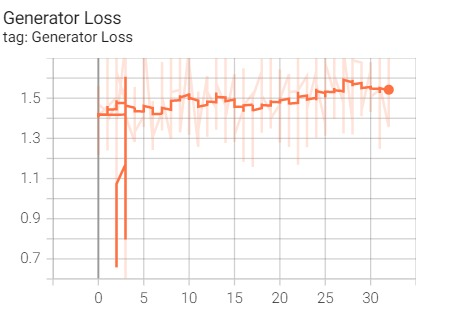

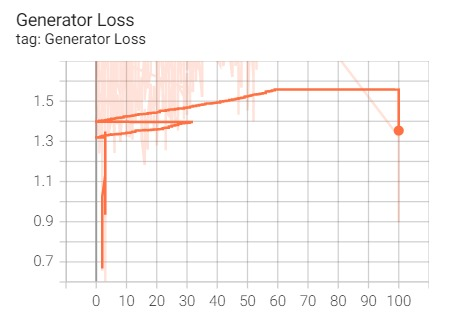